In [1]:
import sys
sys.path.append('C:\\Users\\rep359\\code\\affinewarp')

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
from ava.models.vae import VAE
import os
from ava.data.data_container import DataContainer
import torch

%matplotlib inline

In [3]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('talk')

In [4]:
audio_dirs = ['cohort2_combined_audio']

feature_dirs = ['cohort2_features']

spec_dirs = ['cohort2_specs']

projection_dirs = ['cohort2_projs']

model_fn = 'checkpoint_050.tar'

dc = DataContainer(audio_dirs=audio_dirs, 
                   feature_dirs=feature_dirs,
                   spec_dirs=spec_dirs, 
                   projection_dirs=projection_dirs, 
                   model_filename=model_fn)

In [5]:
dc.fields

{'specs': 1,
 'onsets': 1,
 'offsets': 1,
 'audio_filenames': 1,
 'audio': 1,
 'latent_mean_umap': 1,
 'latent_means': 1}

In [6]:
specs = dc.request('specs')

Reading field: specs
	Done with: specs


In [7]:
model_path = 'checkpoint_050.tar'
model = VAE(save_dir='', model_precision=40.0)
model.load_state(model_path)

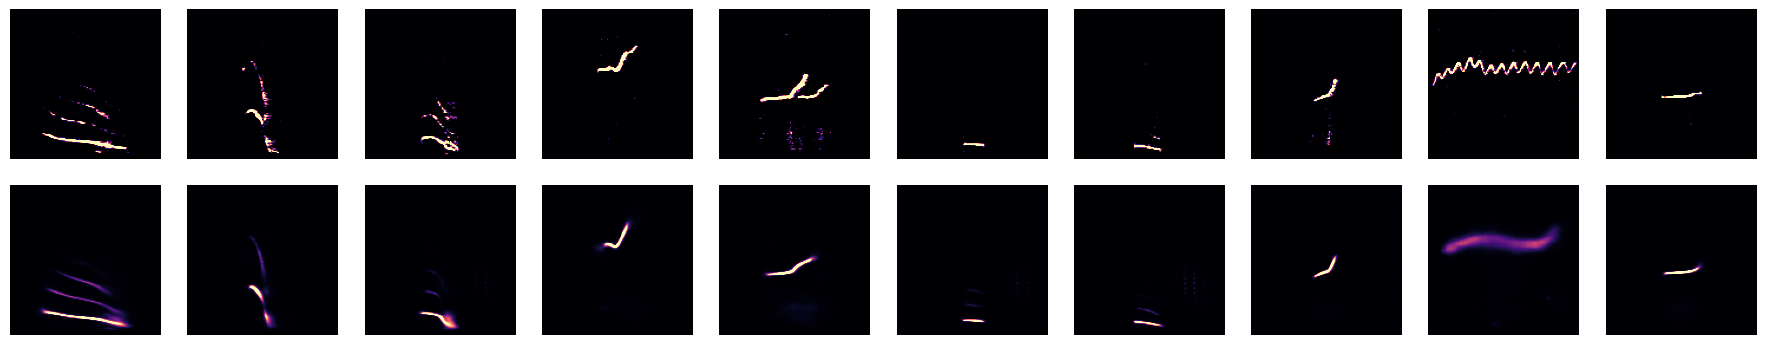

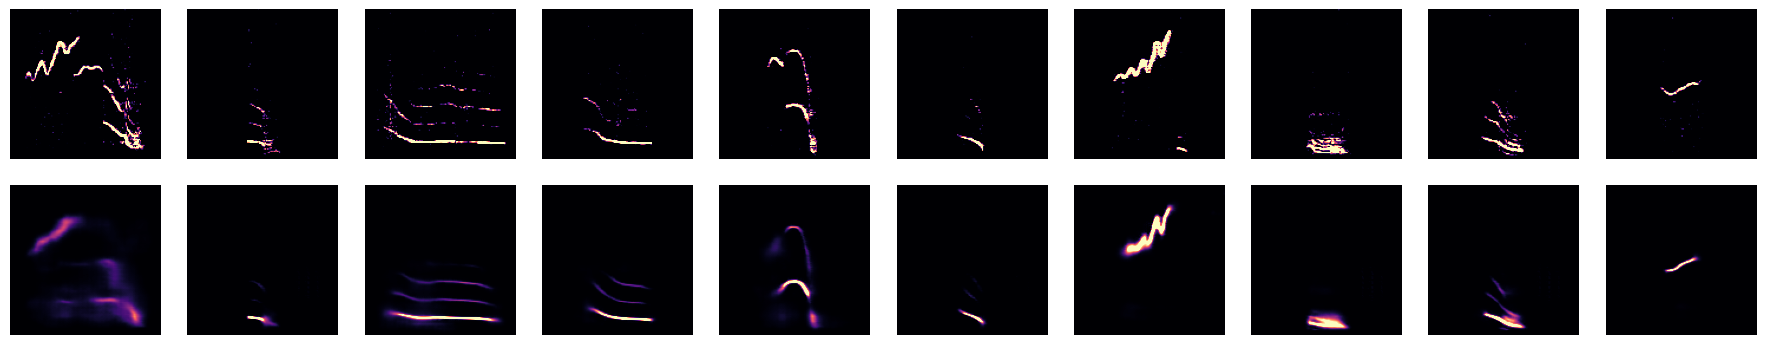

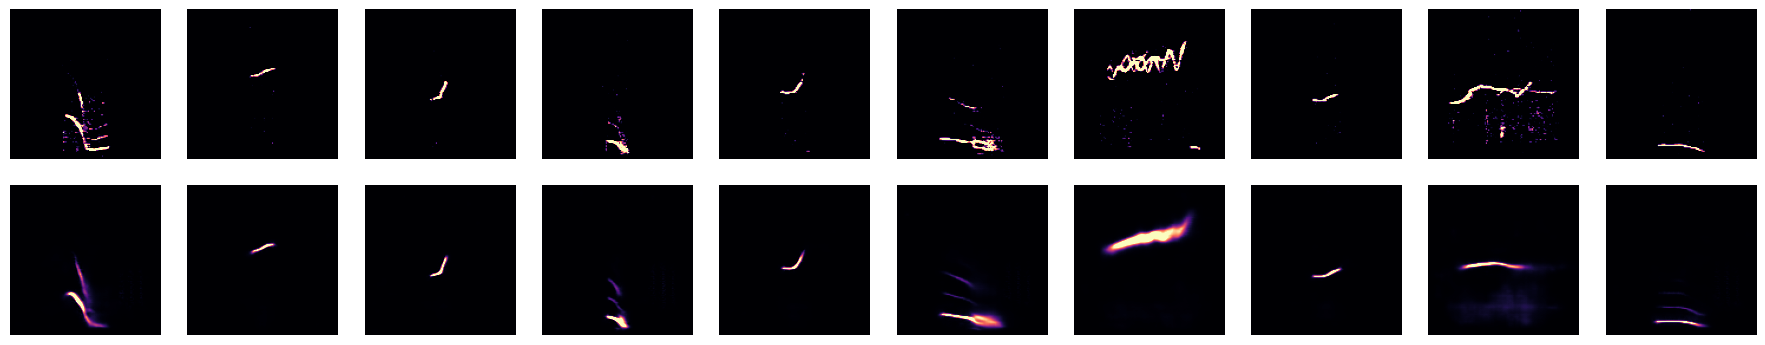

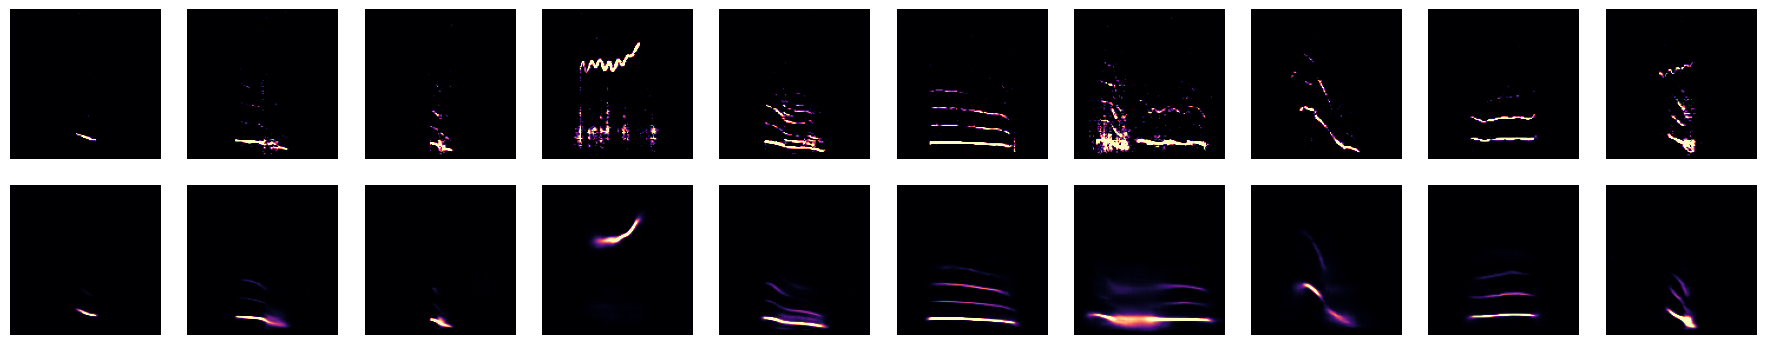

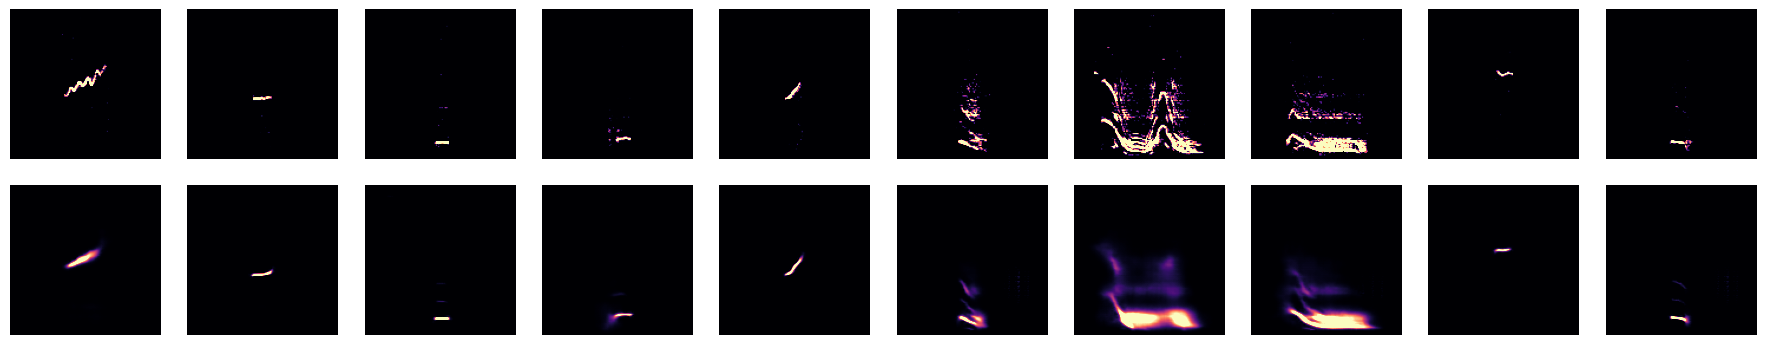

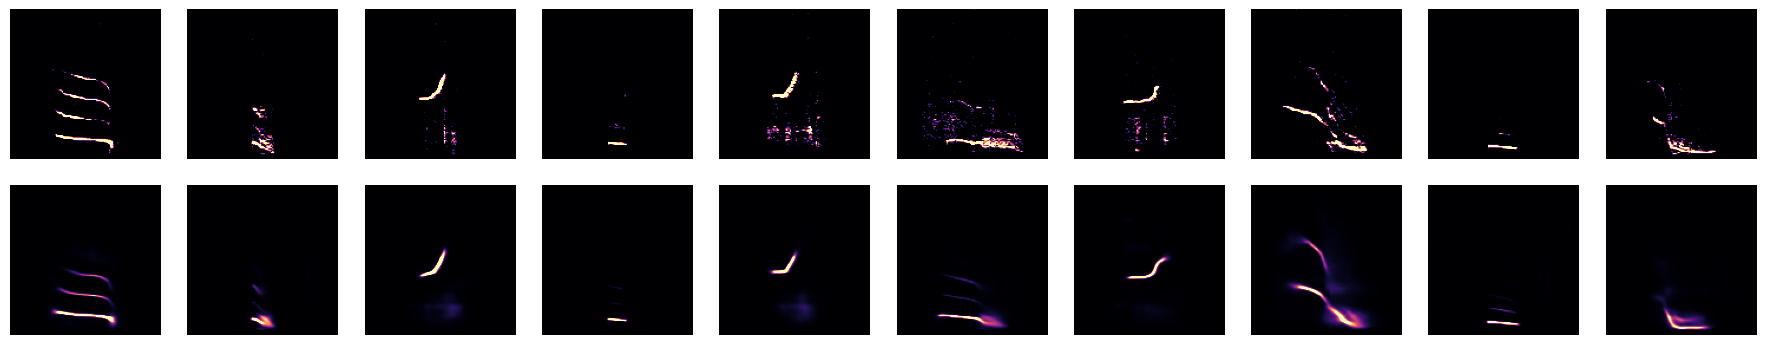

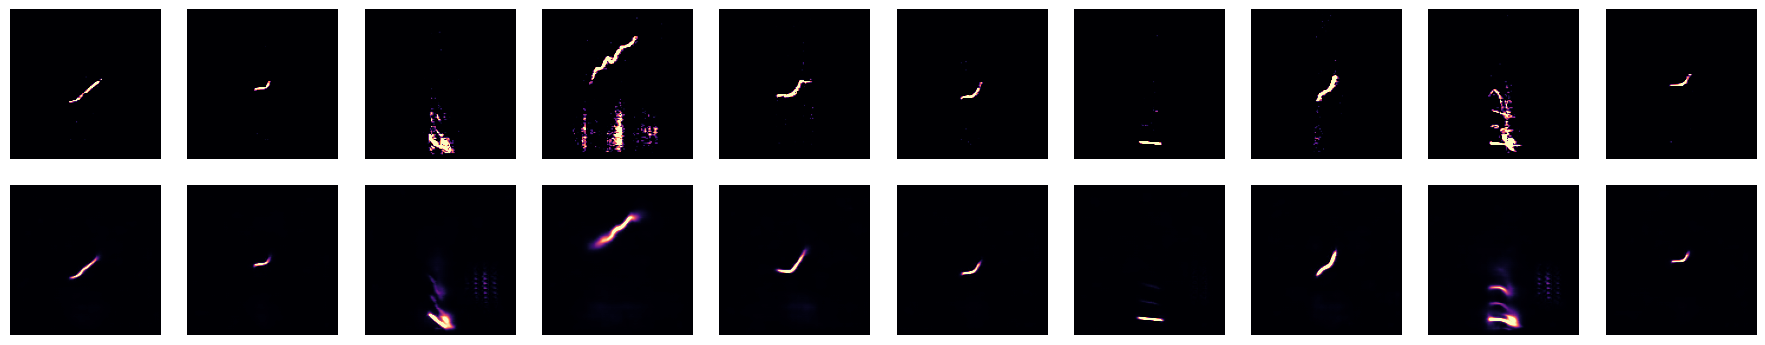

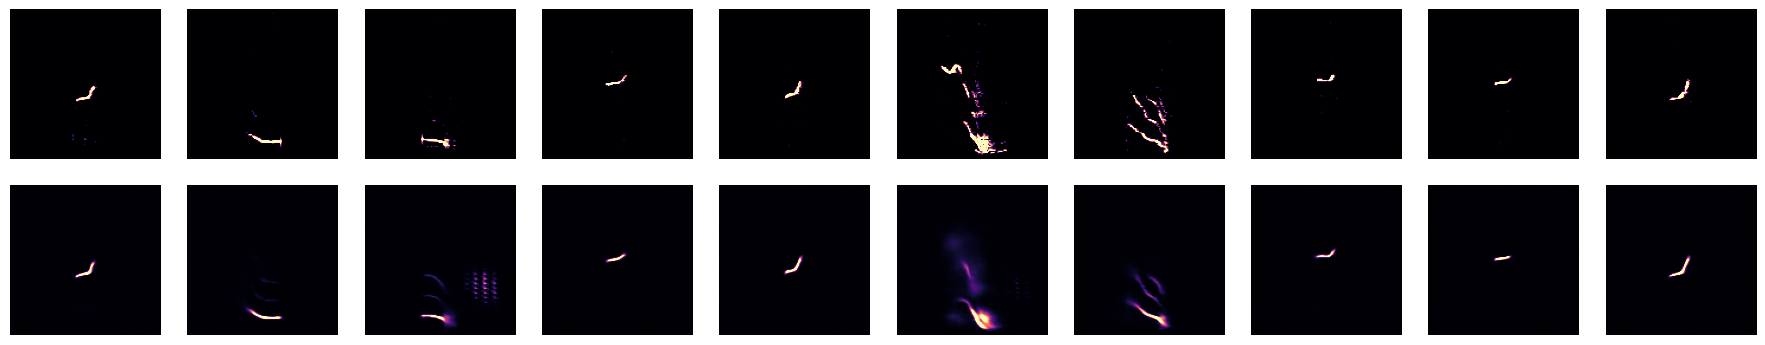

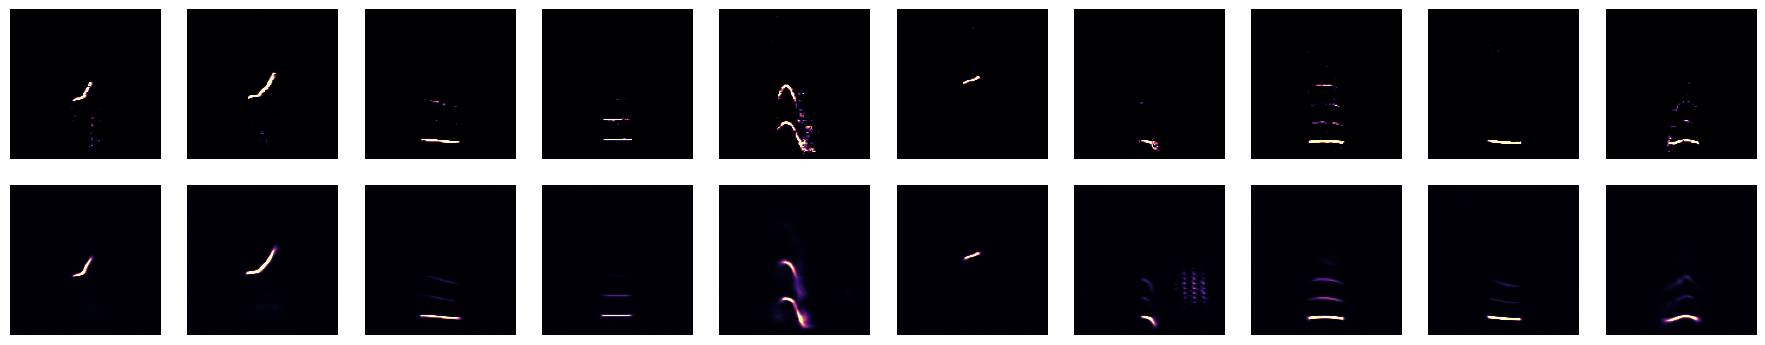

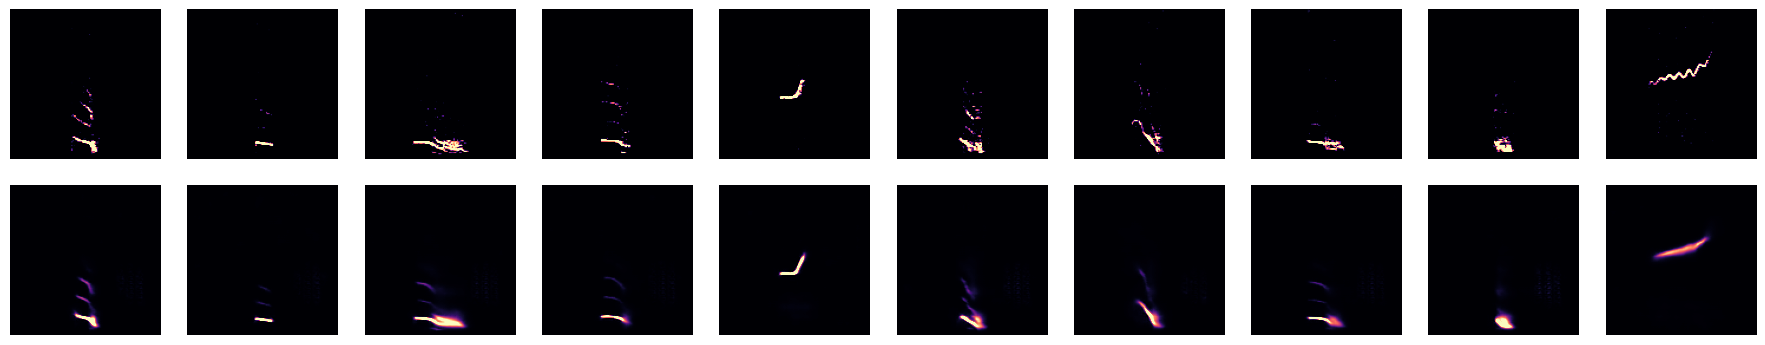

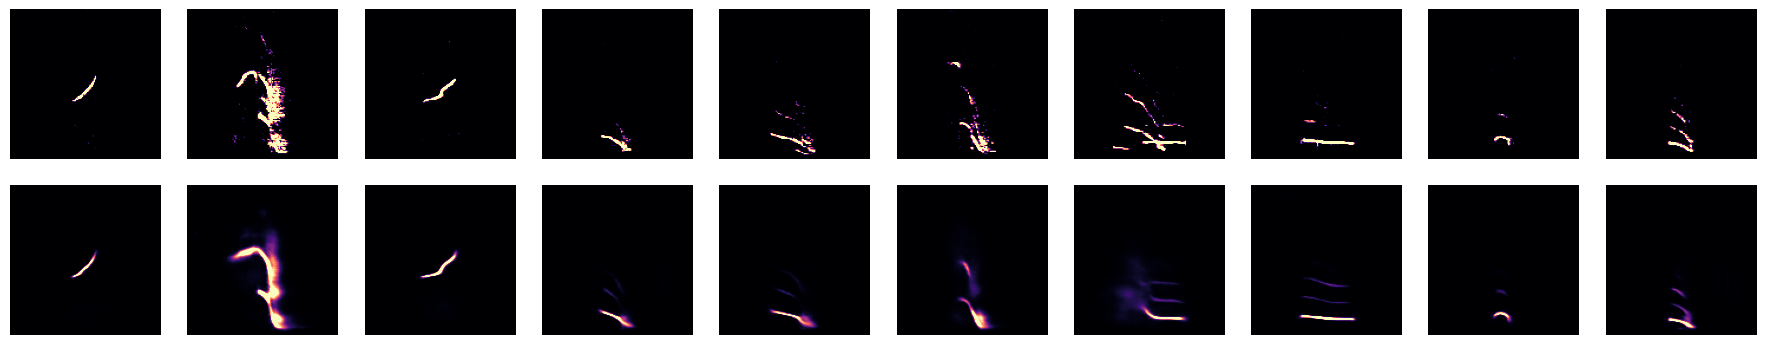

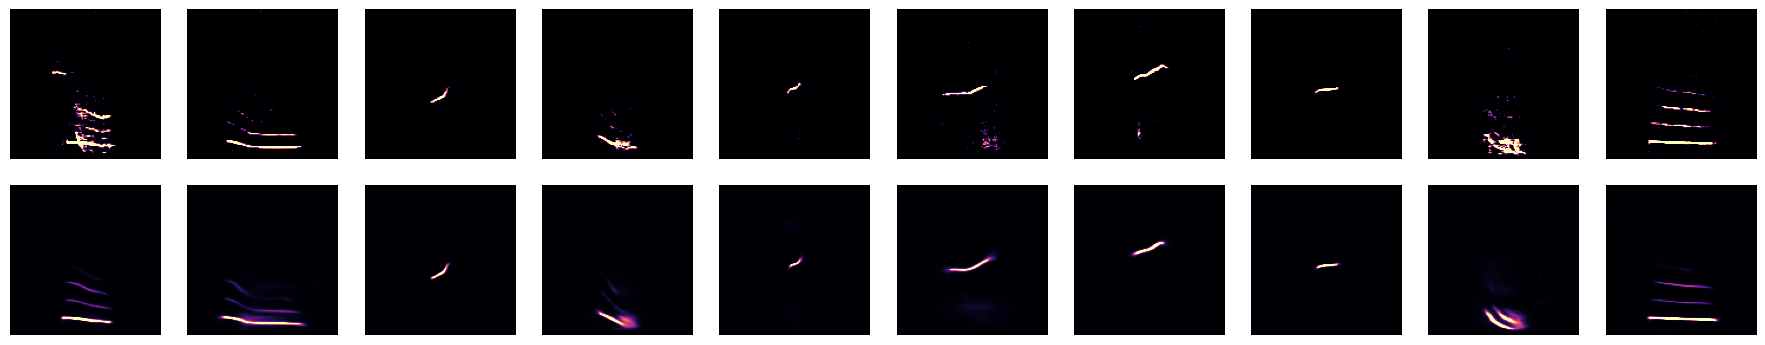

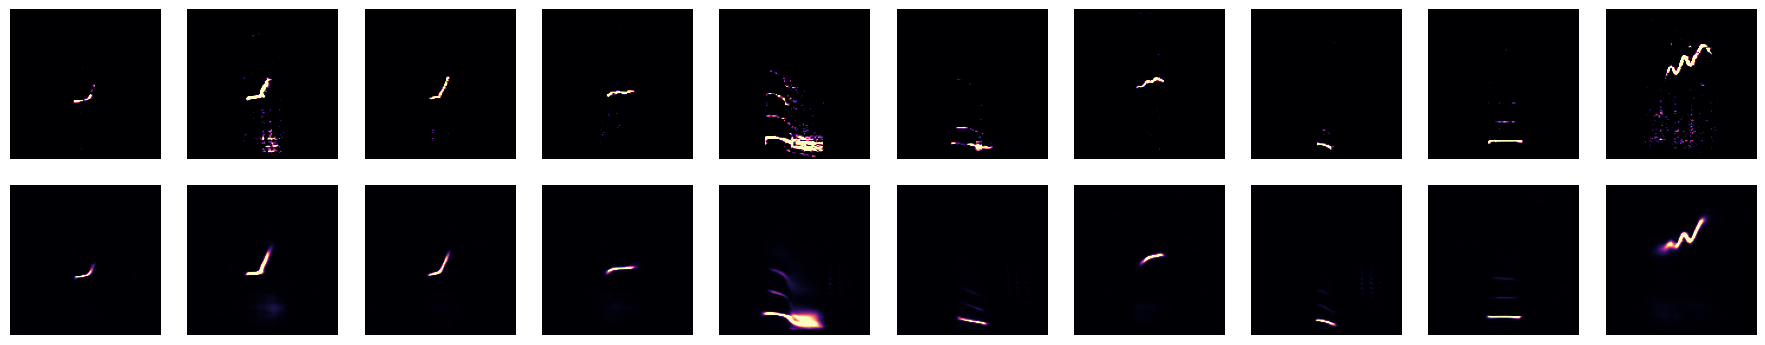

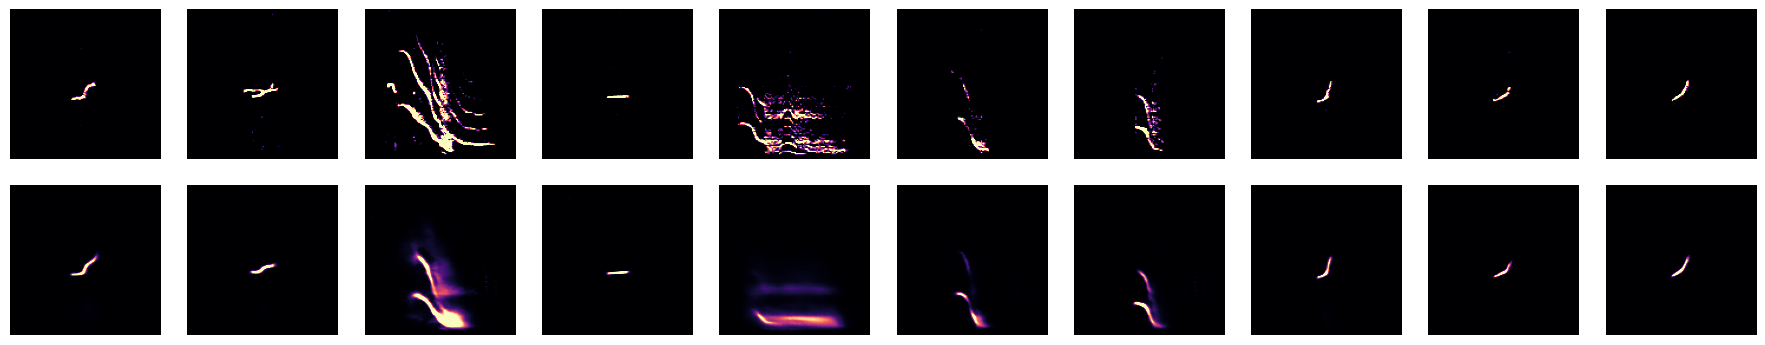

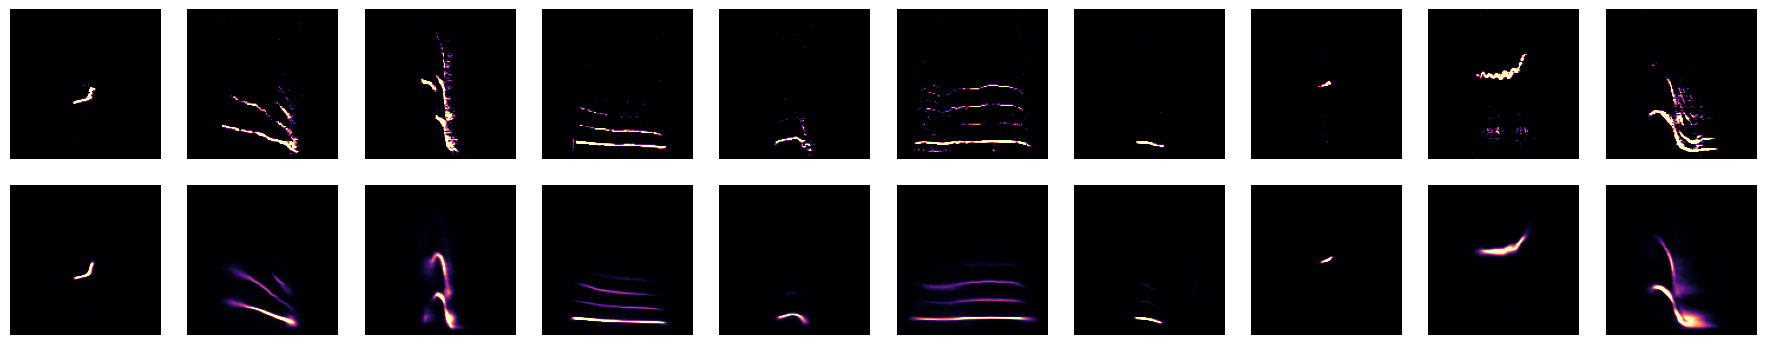

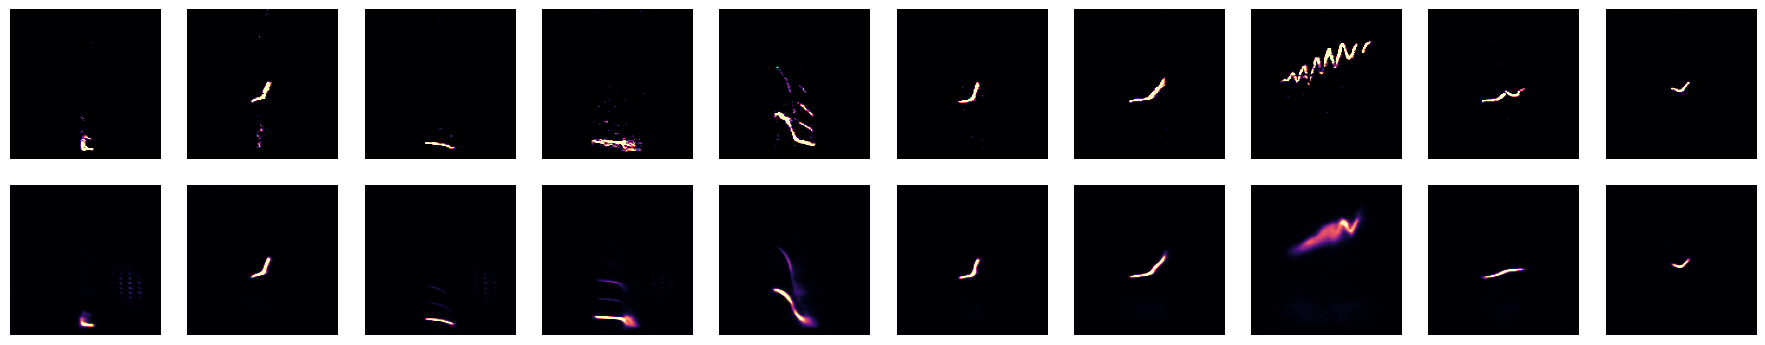

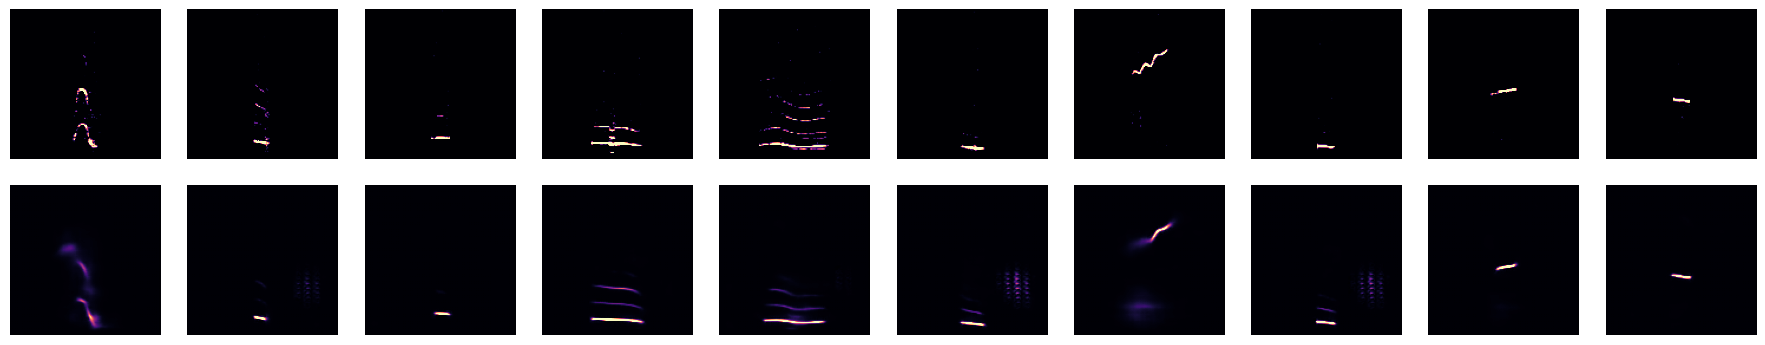

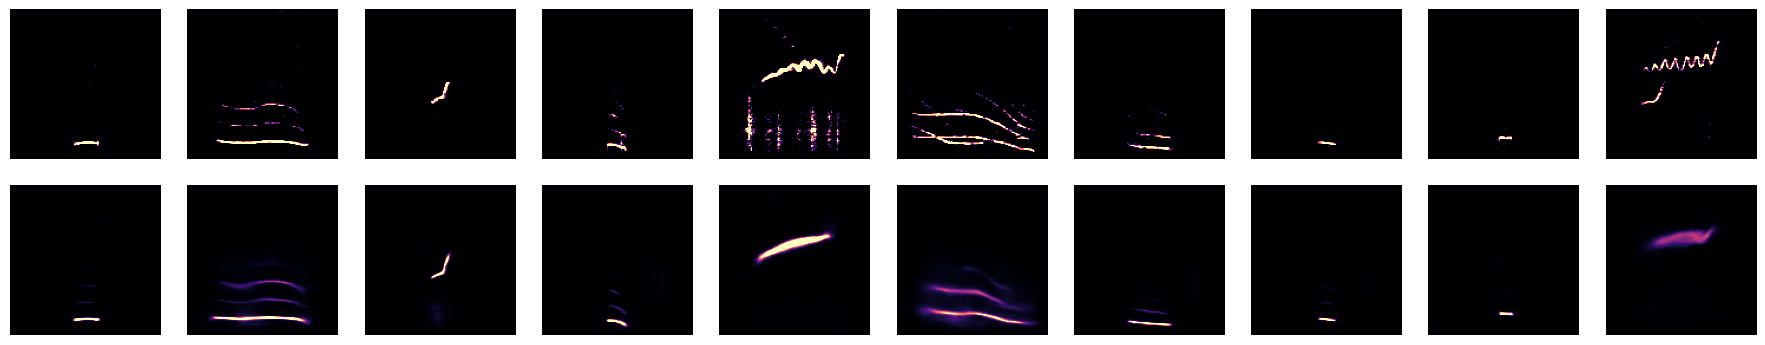

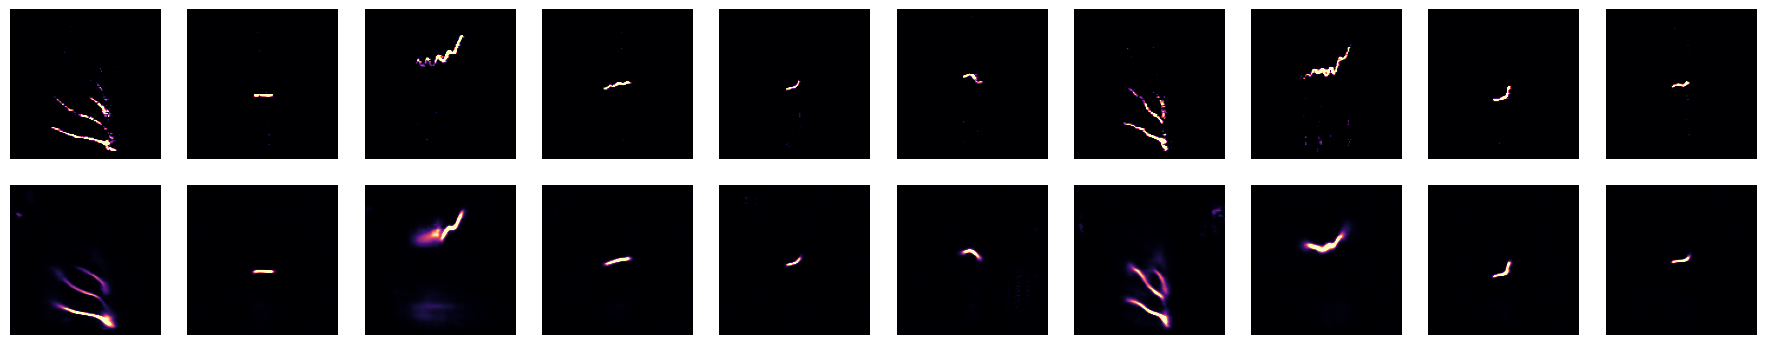

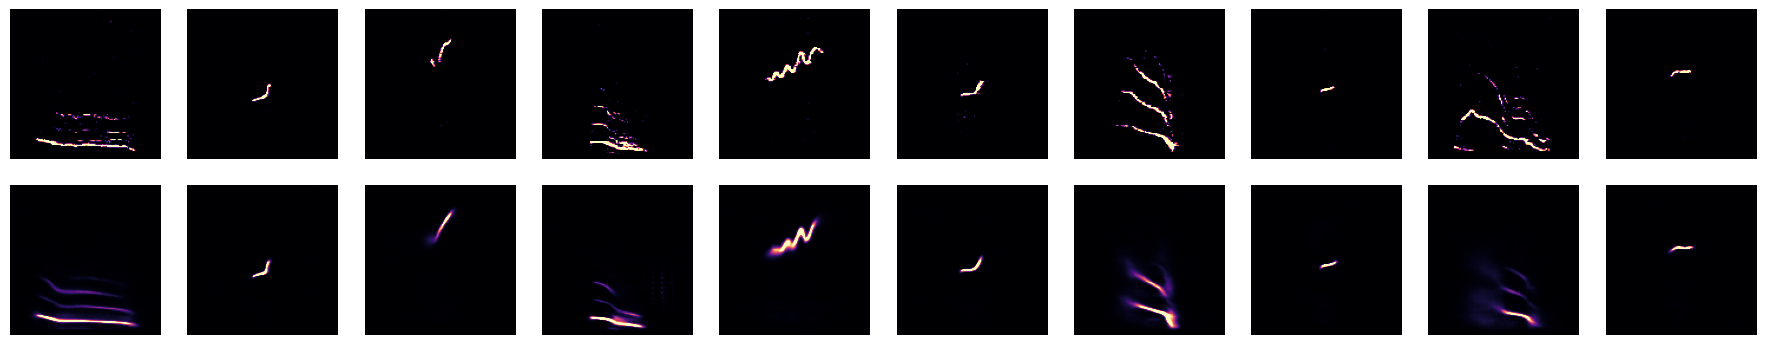

In [8]:
for ex in range(20):
    random_idx = np.random.choice(np.arange(len(specs)), 10)
    reconstruction = model.forward(torch.Tensor(specs[random_idx]).to('cuda'), return_latent_rec=True)

    figure(figsize=(18,4))
    counter = 1
    for i in range(len(random_idx)):

        subplot(2,10,counter)
        imshow(specs[random_idx[i]], clim=(0,.3), cmap='magma')
        gca().invert_yaxis()
        axis('off')

        subplot(2,10,counter+10)
        imshow(reconstruction[2][i], clim=(0,.3), cmap='magma')
        gca().invert_yaxis()
        axis('off')

        counter += 1
    tight_layout()
#     savefig('econstruction_examples_{}.svg'.format(ex), dpi=300)